<a href="https://colab.research.google.com/github/mahmud-nobe/CS110_Assignments/blob/master/CS110_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# rolling hash Function
def get_int(x, base = 128):
    """
    Returns the integer value of a string
    using a specific base
    Input: 
    x: a string
    base: the base of the integer we want to 
    convert it into. Default is 128
    """

    int_x = 0
    n = len(x)-1

    # the first digit is the most significant digit
    # so will be multiplied by len(x)-1
    # the next letters are lesser significant
    for i in range(len(x)):
        int_x += ord(x[i])*base**n
        n -= 1

    return int_x 

In [3]:
get_int('day')

1650937

In [6]:
print(get_int('aaaaa'))
ord('z'), ord('A')

26243264737


(122, 65)

In [0]:
def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    base = 128
    size = max(len(x)**2 - 1, 10**6 + 3)
    hash_table = [[] for i in range(size)]

    if(k > len(x) or k > len(y)):
        print('Warning: substring length is larger than the string length')
        return []
        
    # hash function to hash item and store accordingly
    key = get_int(x[:k]) % size
    hash_table[key].append((0, x[:k]))

    new_key = key
    for i in range(len(x)-k):
        
        # adding the next letter
        new_key = (new_key * base + ord(x[k+i])) % size

        # removing the first letter
        new_key = (new_key - ord(x[i])*(base**k % size) ) % size

        # store the item at corresponding slot
        hash_table[new_key].append((i+1, x[i+1: k+i+1]))

    common_string = []

    ### checking with the substrings of y

    # compute the hash value for first substring in y
    checking_key = get_int(y[:k]) % size
    
    # if any tuple exist in the slot, go through all the stored tuple
    # and check their 2nd element, if match, take their 'x-index' from the
    # first element and store it with 'y-index'.
    if(hash_table[checking_key]):

        for j in range(0, len(hash_table[checking_key])):
            stored_word = hash_table[checking_key][j]
            if stored_word[1] == y[:k]:

                common_string.append((stored_word[0], 0))

    # using rolling hashing to find the hash value for all other substring
    new_key = checking_key
    for i in range(len(y)-k):

        # adding the next letter
        new_key = (new_key * base + ord(y[k+i])) % size

        # removing the first letter
        new_key = (new_key - ord(y[i])*(base**k % size) ) % size


        # if any tuple exist in the slot, go through all the stored tuple
        # and check their 2nd element, if match, take their 'x-index' from the
        # first element and store it with 'y-index'.
        if(hash_table[new_key]):

            for j in range(0, len(hash_table[new_key])):
                stored_word = hash_table[new_key][j]
                if stored_word[1] == y[i+1: k+i+1]:

                    common_string.append((stored_word[0], i+1))

    return common_string
    ## your code here

In [13]:
# test 1
x, y, k = 'todayisourfinalday', 'thisisfriday', 3
print(rh_get_match(x,y,k))


[(2, 9), (15, 9)]


In [16]:
# test 2 - same word
x, y, k = 'stayhometobesafe', 'stayhometobesafe', 3
print(rh_get_match(x,y,k))


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13)]


In [20]:
# test 3 - same word same letter
x, y, k = 'bbbbbbbb', 'bbbbbbbb', 4
print(rh_get_match(x,y,k))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [22]:
# test 4 - one string is empty
x, y, k = '','bbbbbbbb', 4
rh_get_match(x,y,k)

[]

In [24]:
# test 5 - the substring length is higher
x, y, k = 'asdfgh','bbbbbbbb', 8
rh_get_match(x,y,k)

0

#### Regular hashing

In [37]:
# reading the words from the shakespeare file

txt_file = open("t8.shakespeare.txt", "r")
 
entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
print(len(all_text)) # all the word in shakespeare

# joined all word together for using it as a sting
full_text = "".join(x for x in all_text)
full_text[100:200]

'fromtheirLibraryoftheFutureandShakespeareCDROMS.ProjectGutenbergoftenreleasesEtextsthatareNOTplacedi'

In [0]:
import time
# comparing hash function with the previous one

# store the key
multiplication_hash = []
divide_hash = []

# storing hashing time
hash_time = 0
rolling_hash_time = 0

for words in all_text:
    
    # multiplication method
    size = 2**20
    c = (math.sqrt(5) - 1)/2
    start = time.time()
    key = math.floor( size * frac(get_int(words) * c))
    end = time.time()
    hash_time += end - start # increase the time
    multiplication_hash.append(key) # append the key

    # multiplication method
    size = 10**6 + 3
    start = time.time()
    key = get_int(words) % size
    end = time.time()
    rolling_hash_time += end - start # increase the time
    divide_hash.append(key) # append the key
    

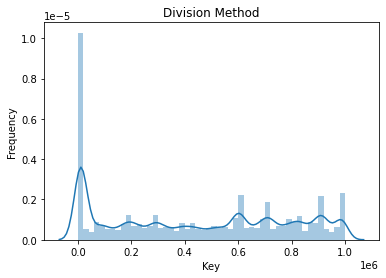

In [44]:
sns.distplot(divide_hash)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Division Method')
plt.show()

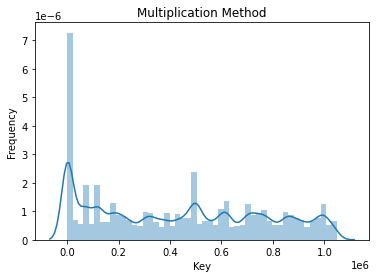

In [45]:
sns.distplot(multiplication_hash)
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Multiplication Method') 
plt.show()

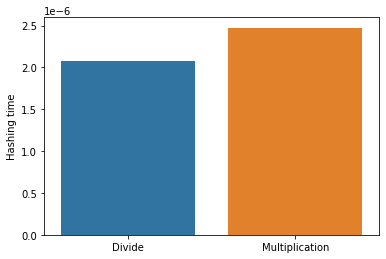

In [46]:
sns.barplot(x = ['Divide', 'Multiplication'], y = [rolling_hash_time/len(all_text), hash_time/len(all_text)])
plt.ylabel('Hashing time')
plt.show()

In [0]:
import math

def frac(x):
    '''
    returns the fractional value of a float
    '''
    return x - math.floor(x)


In [0]:
def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    not using rolling hashing on both strings.
    
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """

    # defining base, siz, c and hash table
    base = 128
    size = max(len(x)**2, 2**20)
    c = (math.sqrt(5) - 1)/2
    hash_table = [[] for i in range(size)]
        
    # hash function to hash the all substring and store acc. to the hash value
    for i in range(len(x) - k + 1):

        key = math.floor( size * frac(get_int(x[i: k+i]) * c))
        hash_table[key].append((i, x[i: k+i]))

    common_string = []

    
    ### checking with the substrings of y

    # using regular hashing to find the hash value for all other substring
    for i in range(len(y) - k + 1):
        
        checking_key = math.floor( size * frac(get_int(y[i: k+i]) * c))
        
        # if any tuple exist in the slot, go through all the stored tuple
        # and check their 2nd element, if match, take their 'x-index' from the
        # first element and store it with 'y-index'.
        if(hash_table[checking_key]):

            for j in range(0, len(hash_table[checking_key])):
                stored_word = hash_table[checking_key][j]
                if stored_word[1] == y[i: k+i]:
                    common_string.append((stored_word[0], i))

    return common_string
    ## your code here

In [28]:
# test 1
x, y, k = 'todayisourfinalday', 'thisisfriday', 3
print(regular_get_match(x,y,k))


[(2, 9), (15, 9)]


In [29]:
# test 2 - same word
x, y, k = 'stayhometobesafe', 'stayhometobesafe', 3
print(regular_get_match(x,y,k))


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13)]


In [30]:
# test 3 - same word same letter
x, y, k = 'bbbbbbbb', 'bbbbbbbb', 4
print(regular_get_match(x,y,k))

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


In [31]:
# test 4 - one string is empty
x, y, k = '','bbbbbbbb', 4
regular_get_match(x,y,k)

[]

In [32]:
# test 5 - the substring length is higher
x, y, k = 'asdfgh','bbbbbbbb', 8
regular_get_match(x,y,k)

[]

### Testing the algorithm:

In [0]:
import string
import random

# random word generator
def randomword(length):
    '''
    Return random word of given length
    '''
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

# same letter word generator
def sameletter(length):
    '''
    Return same letter word of given length
    '''
    letter = random.choice(string.ascii_lowercase)
    return ''.join(letter for i in range(length))

In [36]:
# Testing Random word
x = randomword(10000)
y = randomword(100)
print(x,y)
k = 3
match = rh_get_match(x,y,k)
print(len(match), match )

jrywsbzydsxbxykzvsnbhbuyeituytnpjlfcdbxectajusllgklslkjvarnboorivrurshfjawoapiuynirmtkpvgvqejysditupfuyambacmglnjfeqzbujwfnssnmkatcjiaecudtetnlmvwwrkgupauqzdmjvtyqdmagbvqqpumbyghriwyhshmbqfjdlmzriuoywejfgjatxnojkusuizceeidwixteywklmcndzhhmfycqyxnwmwfpjswoddanllvcjcphaczwwsnvobqznqzkqsgultceeuapkzadwjvdlashpyvphonnaqwirgqkcovtytlqezcuwmwfqkkqhkedemgmkuwvtgprbjxzwbwisdscwkvxjlcyaavlpyvxyvrrdmnmdcslxgktyxeruprxjyzlaqabzbcpgqvxacfysslarimrzdzhimzexqgeijkbxjsfawxxsjgqlwpyupkefkgdskwjlvgzitqkjvsmcftgpimxwvksmyuhqwheeavdcinksrncczzpsrbxdtrueohorwfbhtldqzzkvxqaakrtbivnylsoutukcqafcliqgnqgedumprwbifwzriwcwyxzjvfvpmkyhvctyuzlzafbvgfubgpdftzayblixwbggcsrqfczqqceknllqzzpczdtpmgwfpbaxydlzbawjcedzslyipayryipdxxxqlgsaipgzifxqchkqdgegsqejhmtlvnluhbnzjghicohccadkjnihevpehsczcykwrkvzoesuowjdopyzwterubizuftltztsuqjfyzcgztbugflvlhflgflhxssktojltpakrpusevbbntpdxagmqptemnmbcjlpwpcvszjimffevdnijoosbbgheizbcvofvjcjbvnqkablbahpncsmbzzfyfqgshjhgcgwuyqjmdrbtiqhprpznaojchgnfzryzwwvtarlxyfzzbagfiwzqsytjnrqjzqydtsr

In [0]:
## Self generating graphs for experimental complexity

rolling = [[] for i in range(5)]
regular = [[] for i in range(5)]



iteration = 10
n_list = np.array([30,40,50,60,70,80])
k_list = np.array([5,10,15,20,25,30])

for i in n_list:

    for k in k_list:
        
        rolling_hash_time = [0 for i in range(5)]
        regular_hash_time = [0 for i in range(5)]

        # 1 - strings from shakespear
        for _ in range(iteration):
            x = full_text[:i]
            y = full_text[-1*i:]

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[0] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[0] += end - start
        
        rolling[0].append(rolling_hash_time[0]/iteration)
        regular[0].append(regular_hash_time[0]/iteration)


        # 2 - random different string
        for _ in range(iteration):
            x = randomword(i)
            y = randomword(i)

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[1] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[1] += end - start

        rolling[1].append(rolling_hash_time[1]/iteration)
        regular[1].append(regular_hash_time[1]/iteration)


        # 3 - same letters but different string
        for _ in range(iteration):
            x = sameletter(i)
            y = sameletter(i)

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[2] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[2] += end - start

        rolling[2].append(rolling_hash_time[2]/iteration)
        regular[2].append(regular_hash_time[2]/iteration)


        # 4 - random letters but same string
        for _ in range(iteration):
            x = randomword(i)
            y = x

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[3] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[3] += end - start


        rolling[3].append(rolling_hash_time[3]/iteration)
        regular[3].append(regular_hash_time[3]/iteration)

        
        # 5 - same letters and same string
        for _ in range(iteration):
            x = sameletter(i)
            y = x

            # rolling
            start = time.time()
            rh_hash = rh_get_match(x,y,k)
            end = time.time()
            rolling_hash_time[4] += end - start

            # regular
            start = time.time()
            regular_hash = regular_get_match(x,y,k)
            end = time.time()
            regular_hash_time[4] += end - start

        rolling[4].append(rolling_hash_time[4]/iteration)
        regular[4].append(regular_hash_time[4]/iteration)

        print(i,k,'done')

In [50]:
n_list = np.array([30,40,50,60,70,80])
k_list = np.array([5,10,15,20,25,30])

data = pd.DataFrame({'n_string':n_list.repeat(len(k_list)),
                     'n_substring': np.tile(k_list, len(n_list)),
                     'rolling_hash_shakespeare': rolling[0],
                     'rolling_hash_random': rolling[1],
                     'rolling_hash_same_letter': rolling[2],
                     'rolling_hash_random_letter_same_string': rolling[3],
                     'rolling_hash_all_same': rolling[4],
                     'regular_hash_shakespeare': regular[0],
                     'regular_hash_random': regular[1],
                     'regular_hash_same_letter': regular[2],
                     'regular_hash_random_letter_same_string': regular[3],
                     'regular_hash_all_same': regular[4]})

data.head(10)

,n_string,n_substring,rolling_hash_shakespeare,rolling_hash_random,rolling_hash_same_letter,rolling_hash_random_letter_same_string,rolling_hash_all_same,regular_hash_shakespeare,regular_hash_random,regular_hash_same_letter,regular_hash_random_letter_same_string,regular_hash_all_same
0,30,5,0.430399,1.069313,1.069391,1.068408,1.040672,0.394246,1.042961,1.058301,1.034044,1.080946
1,30,10,0.895931,1.053033,0.983533,1.041462,1.016491,1.099180,1.009363,1.079574,1.038932,1.008950
2,30,15,1.017324,1.063906,1.071345,1.048046,1.081564,1.045367,1.020695,0.963141,1.041252,1.023622
3,30,20,0.907194,1.045189,1.072600,1.100809,1.077415,1.077844,1.043482,1.044101,1.063218,1.051954
4,30,25,1.057337,1.066164,1.048878,1.054932,1.058919,1.015414,1.039476,1.022372,1.027643,1.032256
5,30,30,1.066667,1.046639,1.046074,1.049627,1.086083,1.058442,1.047860,1.046513,1.017551,1.046949
6,40,5,1.061627,1.033974,1.060740,1.039261,1.061533,1.035140,0.992676,1.041907,1.016680,1.068560
7,40,10,1.043391,1.054516,0.973395,1.050620,0.957147,0.984043,1.022253,1.078655,1.026471,0.990346
8,40,15,1.026118,1.030897,1.029321,1.020157,1.055159,0.981758,1.012391,0.995473,0.992672,1.037755
9,40,20,1.019850,1.040526,0.939905,1.018295,1.022647,0.978136,1.019287,1.059494,0.991100,0.971836


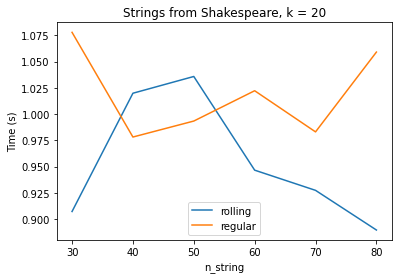

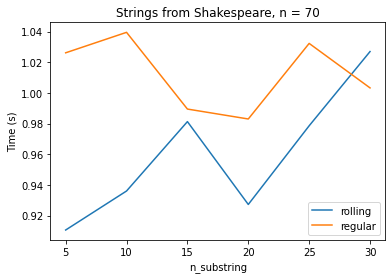

In [68]:
# Strings in shakespeare 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_shakespeare', data = data[data['n_substring'] == 20], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_shakespeare', data = data[data['n_substring'] == 20], 
             label = 'regular', palette = 'Blues')

plt.title('Strings from Shakespeare, k = 20')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_shakespeare', data = data[data['n_string'] == 70], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_shakespeare', data = data[data['n_string'] == 70], 
             label = 'regular', palette = 'Blues')

plt.title('Strings from Shakespeare, n = 70')
plt.ylabel('Time (s)')
plt.show()

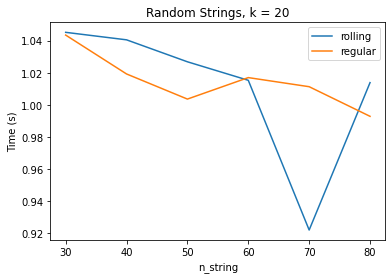

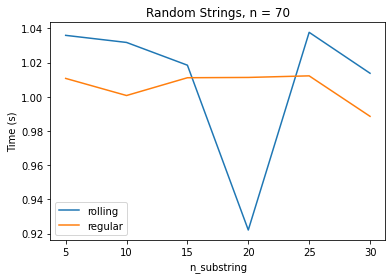

In [69]:
# Random Strings 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_random', data = data[data['n_substring'] == 20], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_random', data = data[data['n_substring'] == 20], 
             label = 'regular')

plt.title('Random Strings, k = 20')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_random', data = data[data['n_string'] == 70], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_random', data = data[data['n_string'] == 70], 
             label = 'regular')

plt.title('Random Strings, n = 70')
plt.ylabel('Time (s)')
plt.show()

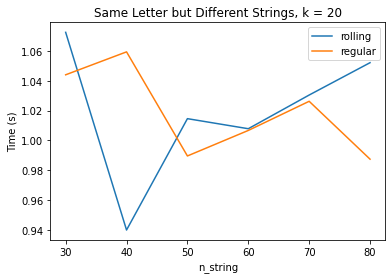

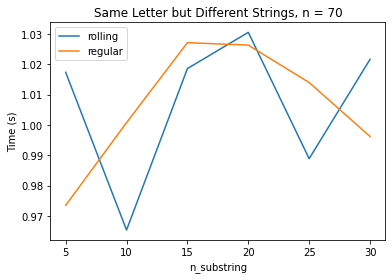

In [70]:
# Same letter different Strings 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_same_letter', data = data[data['n_substring'] == 20], 
             label = 'rolling')
sns.lineplot(x = 'n_string', y = 'regular_hash_same_letter', data = data[data['n_substring'] == 20], 
             label = 'regular')

plt.title('Same Letter but Different Strings, k = 20')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_same_letter', data = data[data['n_string'] == 70], 
             label = 'rolling')
sns.lineplot(x = 'n_substring', y = 'regular_hash_same_letter', data = data[data['n_string'] == 70], 
             label = 'regular')

plt.title('Same Letter but Different Strings, n = 70')
plt.ylabel('Time (s)')
plt.show()

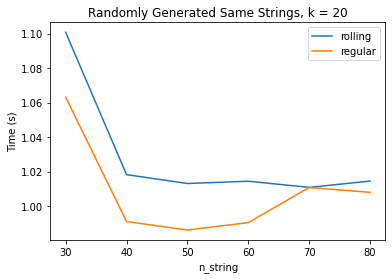

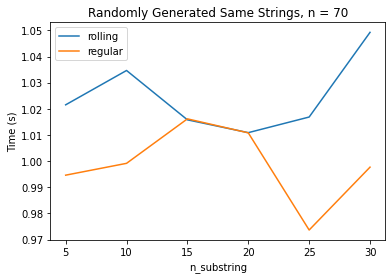

In [71]:
# Randomly Generated Same Strings

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_random_letter_same_string', data = data[data['n_substring'] == 20], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_random_letter_same_string', data = data[data['n_substring'] == 20], 
             label = 'regular')

plt.title('Randomly Generated Same Strings, k = 20')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_random_letter_same_string', data = data[data['n_string'] == 70], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_random_letter_same_string', data = data[data['n_string'] == 70], 
             label = 'regular')

plt.title('Randomly Generated Same Strings, n = 70')
plt.ylabel('Time (s)')
plt.show()

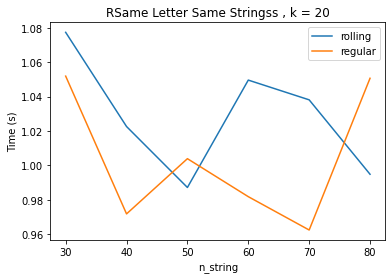

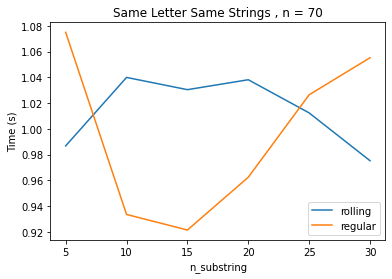

In [72]:
# Same Letter Same Stringss 

# same k, but different n
sns.lineplot(x = 'n_string', y = 'rolling_hash_all_same', data = data[data['n_substring'] == 20], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_string', y = 'regular_hash_all_same', data = data[data['n_substring'] == 20], 
             label = 'regular')

plt.title('RSame Letter Same Stringss , k = 20')
plt.ylabel('Time (s)')
plt.show()

# same n, but different k
sns.lineplot(x = 'n_substring', y = 'rolling_hash_all_same', data = data[data['n_string'] == 70], 
             label = 'rolling', palette = 'Greens')
sns.lineplot(x = 'n_substring', y = 'regular_hash_all_same', data = data[data['n_string'] == 70], 
             label = 'regular')

plt.title('Same Letter Same Strings , n = 70')
plt.ylabel('Time (s)')
plt.show()